# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aerku\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language = 'en', 
    sort_by = 'relevancy'
)

print(f" Total news articles about the Bitcoin : {Bitcoin_news['totalResults']}")

 Total news articles about the Bitcoin : 8695


In [5]:
#Bitcoin sample article
Bitcoin_news['articles'][2]

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [6]:
# Fetch the Ethereum news articles
Ethereum_news = newsapi.get_everything(
    q='ethereum',
    language='en', 
    sort_by = 'relevancy'
)

print(f"Total news article about the Ethereum : {Ethereum_news['totalResults']}")

Total news article about the Ethereum : 1985


In [7]:
#Ethereum sample article
Ethereum_news['articles'][2]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'David Riggs',
 'title': 'If you haven’t followed NFTs, here’s why you should start',
 'description': 'Digital content has value, and crypto collectors are flocking to lay their namesake on the biggest collections of tomorrow.',
 'url': 'http://techcrunch.com/2021/02/27/if-you-havent-followed-nfts-heres-why-you-should-start/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2018/03/gettyimages-883634210.jpg?w=574',
 'publishedAt': '2021-02-27T13:26:25Z',
 'content': 'NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in Bitcoin_news['articles']:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu,
            'text' : text
        })
    
    except AttributeError:
        pass

#Creating DataFrame

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...
1,0.1779,0.051,0.032,0.916,When Bitcoin first appeared out of digital thi...
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.7041,0.140,0.000,0.860,"Bitcoin is the future, again: this morning, it..."


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in Ethereum_news['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        ethereum_sentiments.append({
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu,
            'text' : text
        })
        
    except AttriburError:
        pass

#Create DataFrame

ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,compound,positive,negative,neutral,text
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...
1,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...
2,0.4404,0.091,0.000,0.909,NFTs (non-fungible tokens) — or scarce digital...
3,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...
4,0.7096,0.144,0.000,0.856,Attempting to get ahead of cryptocurrency mine...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.293317,0.073056,0.006333,0.865000
std,0.298270,0.067136,0.020330,0.225785
min,-0.128000,0.000000,0.000000,0.000000
25%,0.000000,0.010500,0.000000,0.856250
50%,0.213950,0.061000,0.000000,0.914000
75%,0.559650,0.110000,0.000000,0.957250
max,0.831600,0.246000,0.082000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.074700,0.019200,0.906100
std,0.370410,0.062607,0.043104,0.070778
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.307100,0.073500,0.000000,0.915500
75%,0.473275,0.096500,0.000000,0.946750
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest mean compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aerku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_add = {'ha', 'non'}


In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
   
    #tokenizer Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_add)]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin

bitcoin_df['token'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,positive,negative,neutral,text,token
0,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
1,0.1779,0.051,0.032,0.916,When Bitcoin first appeared out of digital thi...,"[bitcoin, first, appeared, digital, thin, air,..."
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, coinb..."
3,0.0000,0.000,0.000,0.000,,[]
4,0.7041,0.140,0.000,0.860,"Bitcoin is the future, again: this morning, it...","[bitcoin, future, morning, hit, time, high, va..."


In [17]:
# Create a new tokens column for Ethereum

ethereum_df['token'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,positive,negative,neutral,text,token
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."
2,0.4404,0.091,0.000,0.909,NFTs (non-fungible tokens) — or scarce digital...,"[nfts, fungible, token, scarce, digital, conte..."
3,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...,"[first, christie, auction, digital, artwork, b..."
4,0.7096,0.144,0.000,0.856,Attempting to get ahead of cryptocurrency mine...,"[attempting, get, ahead, cryptocurrency, miner..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2

big_string_b = ' '.join(bitcoin_df['text'])
input_text_b = tokenizer(big_string_b)
bigrams_b = Counter(ngrams(input_text_b, n=2))

print(list(bigrams_b.most_common(20)))

[(('char', 'reuters'), 4), (('reuters', 'staff'), 4), (('jack', 'dorsey'), 2), (('jay', 'z'), 2), (('char', 'bitcoin'), 2), (('cryptocurrency', 'exchange'), 2), (('time', 'high'), 2), (('get', 'char'), 2), (('friday', 'char'), 2), (('investment', 'giveaway'), 2), (('staff', 'file'), 2), (('file', 'photo'), 2), (('virtual', 'currency'), 2), (('illustration', 'taken'), 2), (('illustration', 'reuters'), 2), (('twitter', 'square'), 1), (('square', 'ceo'), 1), (('ceo', 'jack'), 1), (('dorsey', 'rapper'), 1), (('rapper', 'jay'), 1)]


In [20]:
# Generate the Ethereum N-grams where N=2

big_string_e = ' '.join(ethereum_df['text'])
input_text_e = tokenizer(big_string_e)
bigrams_e = Counter(ngrams(input_text_e, n=2))

print(list(bigrams_e.most_common(20)))

[(('char', 'reuters'), 6), (('reuters', 'staff'), 6), (('record', 'high'), 4), (('char', 'nfts'), 3), (('feb', 'reuters'), 3), (('staff', 'singapore'), 3), (('file', 'photo'), 3), (('cryptocurrency', 'miner'), 2), (('fungible', 'token'), 2), (('char', 'new'), 2), (('new', 'york'), 2), (('reuters', 'ethereum'), 2), (('ethereum', 'second'), 2), (('second', 'largest'), 2), (('largest', 'cryptocurrency'), 2), (('cryptocurrency', 'term'), 2), (('term', 'market'), 2), (('market', 'capitalization'), 2), (('capitalization', 'volume'), 2), (('volume', 'hit'), 2)]


In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
top10_b = token_count(input_text_b, 10)
print(top10_b)

[('char', 17), ('bitcoin', 13), ('reuters', 10), ('cryptocurrency', 7), ('staff', 4), ('illustration', 4), ('ceo', 3), ('dorsey', 3), ('friday', 3), ('exchange', 3)]


In [24]:
# Use token_count to get the top 10 words for Ethereum
top10_e = token_count(input_text_e, 10)
print(top10_e)

[('char', 20), ('reuters', 15), ('cryptocurrency', 10), ('ethereum', 8), ('bitcoin', 8), ('new', 7), ('staff', 6), ('week', 5), ('record', 5), ('high', 5)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

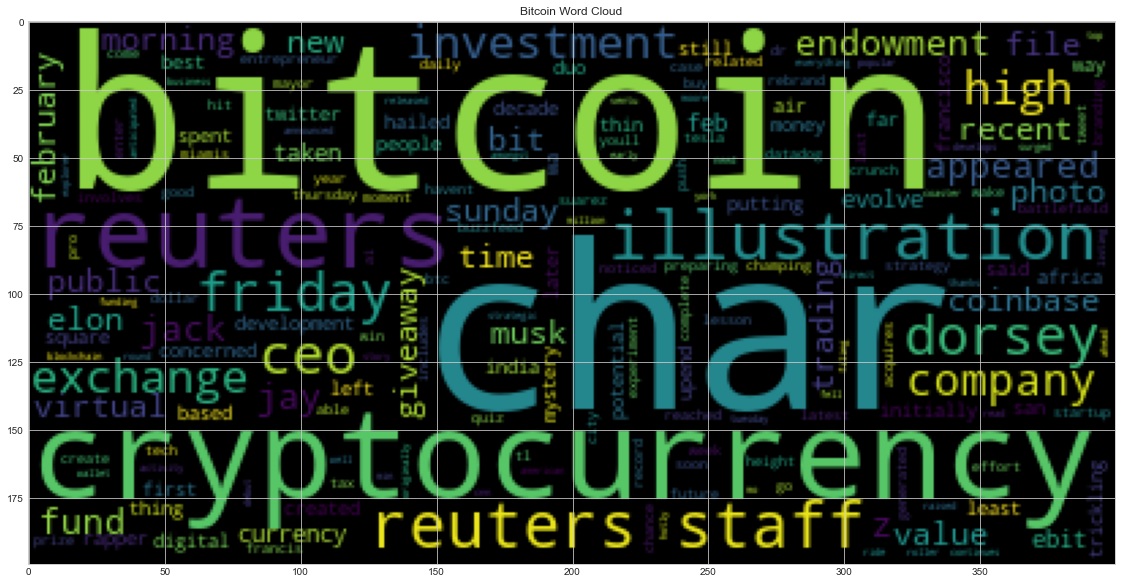

In [26]:
# Generate the Bitcoin word cloud
wc_b = WordCloud().generate(' '.join(input_text_b))
plt.imshow(wc_b)
plt.title('Bitcoin Word Cloud')

Text(0.5, 1.0, 'Ethereum Word Cloud')

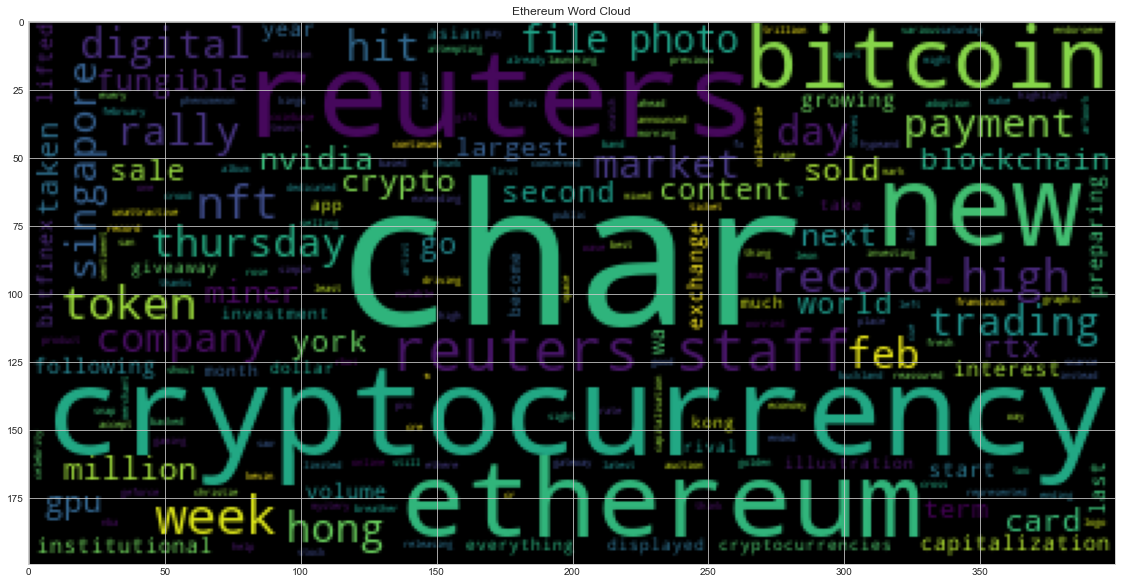

In [27]:
# Generate the Ethereum word cloud
wc_e = WordCloud().generate(' '.join(input_text_e))
plt.imshow(wc_e)
plt.title('Ethereum Word Cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_text

'Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] When Bitcoin first appeared out of digital thin air, it was hailed as having the potential to upend the way people spent money. But more than a decade later, cryptocurrency is still only trickling in… [+2039 chars] Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] Miamis mayor, Francis Suarez, is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that

In [34]:
# Run the NER processor on all of the text
bitcoin_all = nlp(bitcoin_text)

# Add a title to the document
bitcoin_all.user_data['title'] = 'Bitcoin NER'

In [35]:
# Render the visualization
displacy.render(bitcoin_all, style='ent')

In [36]:
# List all Entities
for ent in bitcoin_all.ents:
    print(ent.text, '-',  ent.label_)

Twitter - PRODUCT
Square - PERSON
Jack Dorsey - PERSON
Jay Z - PERSON
Africa - LOC
India - GPE
Dorsey - ORG
Friday - DATE
500 - CARDINAL
first - ORDINAL
more than a decade later - DATE
Coinbase - NORP
San Francisco - GPE
last year - DATE
Thursday - DATE
this morning - TIME
over $50,000 - MONEY
Francis Suarez - PERSON
Jack Dorsey - PERSON
Jay Z - PERSON
Datadog - ORG
Startup Battlefield - ORG
BuzzFeed - ORG
AI - ORG
Daily Crunch - WORK_OF_ART
February 12, 2021 - DATE
Bitcoins - PERSON
recent weeks - DATE
Friday - DATE
over $12,000 - MONEY
New York - GPE
CNN - ORG
above $58,000 - MONEY
Sunday - DATE
just above $46,000 - MONEY
Tuesday - DATE
Blockchain.com - ORG
$120 million - MONEY
Moore Strategic Ventu - PERSON
This morning - TIME
Coinbase - WORK_OF_ART
American - NORP
19, 2021 - DATE
Elon Musk - PERSON
Binance - GPE
Changp - GPE
Reuters - ORG
Dec. 8, 2017 - DATE
Benoit Tessier/Illustration - ORG
Reuters - ORG
Reuters - ORG
Bitcoin - PERSON
January 21, 2021 - DATE
Reuters - ORG
Reuters 

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week,

In [38]:
# Run the NER processor on all of the text
doc_e = nlp(ethereum_text)

# Add a title to the document
doc_e.user_data['title'] = 'Ethereum NER'

In [39]:
# Render the visualization
displacy.render(doc_e, style='ent')

In [40]:
# List all Entities
for ent in doc_e.ents:
    print(ent.text, '-',  ent.label_)

GeForce - ORG
3060 - GPE
GPU - ORG
these days - DATE
Kings - PERSON
NBA - ORG
millions - CARDINAL
Ethereum - ORG
first - ORDINAL
Christie's - ORG
NFT - ORG
a few days - DATE
Chris Torres - PERSON
3060 - DATE
GPU - ORG
next week - DATE
Nvidia - PERSON
this morning - TIME
NEW YORK - GPE
Reuters - ORG
second - ORDINAL
Thursday - DATE
NEW YORK - GPE
Feb 18 - DATE
Reuters - ORG
second - ORDINAL
Thursday - DATE
7.34% - PERCENT
the week ending 21st February - DATE
11.65% - PERCENT
the previous week - DATE
Ethereum ended - ORG
the week - DATE
1,935.57 - MONEY
the week - DATE
Coinbase - NORP
San Francisco - GPE
last year - DATE
Thursday - DATE
Bitfinex - ORG
Bitfinex - ORG
millions of dollars - MONEY
Reuters - ORG
SINGAPORE - PERSON
Reuters - ORG
Asian - NORP
Saturday - DATE
two-month - DATE
$1 trillion - MONEY
a day earlier - DATE
World FX - ORG
Kevin Buckland - PERSON
Reuters - ORG
Meitu - ORG
Hong Kong - GPE
China - GPE
March 24, 2017 - DATE
Bobby Yip - PERSON
HONG KONG - GPE
Reuters - ORG
H

---